In [293]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
file = '/home/ck/DIR/cornkle/data/NFLICS/cell_stats14.2_n18_15.2_n16_Unique_msg9_cell_mean_cellthresh_n70_cellpixlt_n70_freq_mean_00000_refhours_18_21.csv' 

In [4]:
tab = pd.read_table(file, parse_dates=True, delimiter=',')

In [5]:
test= tab[tab.time==tab.time[0]]
test.com_lon.values

array([26.])

In [6]:
tab

,time,com_lon,com_lat,cell_min_T,cell_mean_T,cell_area_km2
0,2004-08-07 20:00:00,26.0,235.0,-83.0,-74.0,8067.97
1,2005-08-19 18:00:00,19.0,232.0,-79.0,-74.0,18732.42
2,2005-08-29 20:00:00,11.0,240.0,-84.0,-74.0,16755.44
3,2006-07-24 19:00:00,28.0,224.0,-86.0,-76.0,6564.46
4,2006-07-26 18:00:00,13.0,253.0,-84.0,-75.0,12379.89
5,2006-08-12 18:00:00,21.0,252.0,-80.0,-74.0,10431.65
6,2006-09-07 18:00:00,28.0,224.0,-78.0,-74.0,8965.96
7,2007-07-17 18:00:00,24.0,244.0,-87.0,-76.0,9453.58
8,2007-07-25 18:00:00,30.0,234.0,-83.0,-74.0,13388.85
9,2007-08-02 21:00:00,28.0,237.0,-80.0,-74.0,13366.93


In [7]:
tab.time

0     2004-08-07 20:00:00
1     2005-08-19 18:00:00
2     2005-08-29 20:00:00
3     2006-07-24 19:00:00
4     2006-07-26 18:00:00
5     2006-08-12 18:00:00
6     2006-09-07 18:00:00
7     2007-07-17 18:00:00
8     2007-07-25 18:00:00
9     2007-08-02 21:00:00
10    2007-08-23 18:00:00
11    2007-09-06 21:00:00
12    2007-09-12 21:00:00
13    2007-09-17 21:00:00
14    2008-07-29 20:00:00
15    2008-08-07 19:00:00
16    2008-08-09 20:00:00
17    2009-08-08 20:00:00
18    2009-08-24 21:00:00
19    2009-08-28 19:00:00
20    2010-08-31 20:00:00
21    2011-08-03 19:00:00
22    2011-08-18 20:00:00
23    2011-09-12 20:00:00
24    2012-07-02 20:00:00
25    2012-07-12 20:00:00
26    2012-08-26 18:00:00
27    2012-09-04 20:00:00
28    2012-09-06 18:00:00
29    2012-09-07 18:00:00
30    2013-08-06 21:00:00
31    2013-08-07 18:00:00
32    2013-09-17 19:00:00
33    2014-08-26 18:00:00
34    2014-08-27 19:00:00
35    2014-08-28 20:00:00
36    2014-09-09 20:00:00
37    2014-09-16 18:00:00
38    2015-0

In [8]:
pd.to_datetime(tab.time.values[0]).month

8

In [9]:
def cut_kernel(xpos, ypos, arr, date, lon, lat):

    #AMSRE 0.25 degrees ~ 27.5 km
    dist = 10

    kernel = u_arrays.cut_kernel(arr,xpos, ypos,dist)


    # if (np.sum(np.isfinite(kernel)) < 0.10 * kernel.size):
    #     return

    kernel3 = kernel - np.nanmean(kernel)

    cnt = np.zeros_like(kernel)
    cnt[np.isfinite(kernel)] = 1

    if kernel.shape != (dist*2+1, dist*2+1):
        return None

    return kernel, kernel3, cnt

In [805]:
def run(shift):
    dic = {
    'q' : [],
    't' : [],
    'u' : [],
    'v' : [],
    'w' : [],
    'u_orig' : [],
    'v_orig' : [],        
    'd' : [],
    't2' : [],
    'u100' : [],
    'v100' : [],
    'u100_orig' : [],
    'v100_orig' : [],
    'slp' : [],
    'cnt' : [],
    'mcc' : [],
    'hcc' : [],
    'cape' : [],
    'divMoist' : [],
    'ice' : [],
    'ice_orig' : [],
    'sh' : [],
    'rh' : [],
    'zshear' : []
    }
    
    clim = '/home/ck/DIR/mymachine/ERA5/monthly/synop_selfmade/CLIM_2000-2014/'


    for date in tab.time:


        single = tab[tab.time==date]

        dt = pd.to_datetime(date)
        daystring = str(abs(shift))
        dayd = pd.Timedelta(daystring + 'days')
        if shift < 0:
            dt = dt - dayd
        if shift >=0:
            dt = dt + dayd
            
        window1 = dt - pd.Timedelta('7days')
        window2 = dt + pd.Timedelta('7days')
        

        fdate = '_' + str(dt.year) +'_' + str(dt.month).zfill(2) + '_'# + str(dt.day).zfill(2)
        
        hour = 12
        shour = 12

        try:

            lsta = xr.open_dataset(cnst.ERA5 + 'hourly/pressure_levels/ERA5' + fdate + 'pl.nc') #sma  #'AMSR_L3_LPRMv05_A_'
            lsta_clim = xr.open_dataset(clim + \
                            'pressure_levels/ERA5_2000-2014_CLIM_' + str(dt.month).zfill(2) + '-'+str(hour).zfill(2)+'_pl.nc')
            
            srfc = xr.open_dataset(cnst.ERA5 + 'hourly/surface/ERA5' + fdate + 'srfc.nc') #sma  #'AMSR_L3_LPRMv05_A_'
            srfc_clim = xr.open_dataset(clim + \
                            'surface/ERA5_2000-2014_CLIM_' + str(dt.month).zfill(2) + '-'+str(hour).zfill(2)+'_srfc.nc')

        except:
            print('File missing', cnst.ERA5  + 'hourly/pressure_levels/ERA5' + fdate + 'pl.nc')
            continue
            
        lsta = u_darrays.flip_lat(lsta)
        srfc = u_darrays.flip_lat(srfc)
        

        lsta = lsta.sel(longitude=slice(-18, -5), latitude=slice(9,17))
        lsta_clim = lsta_clim.sel(lon=slice(-18, -5), lat=slice(9, 17))
        
        srfc = srfc.sel(longitude=slice(-18, -5), latitude=slice(9,17))
        srfc_clim = srfc_clim.sel(lon=slice(-18, -5), lat=slice(9, 17))
        
        pos = np.where(lsta['time.hour']==shour)
        if np.sum(pos) == 0:
            continue
        
        try:
            lsta_low = lsta.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(hour).zfill(2)+':00:00', level=925)
        except:
            continue
        lsta_up = lsta.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(hour).zfill(2)+':00:00', level=650)
        
        srfc_low = srfc.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(hour).zfill(2)+':00:00')
        
        lsta10 = lsta.isel(time=pos[0])
        lsta10_low = lsta10.sel(time=slice(str(window1.year)+'-'+str(window1.month)+'-'+str(window1.day)+'T'+str(shour).zfill(2)+':00:00' , \
                                      str(window2.year)+'-'+str(window2.month)+'-'+str(window2.day)+'T'+str(shour).zfill(2)+':00:00'), level=925)
        
        lsta10_up = lsta10.sel(time=slice(str(window1.year)+'-'+str(window1.month)+'-'+str(window1.day)+'T'+str(shour).zfill(2)+':00:00' , \
                                      str(window2.year)+'-'+str(window2.month)+'-'+str(window2.day)+'T'+str(shour).zfill(2)+':00:00'), level=650)
        
        
        
#         lsta10_low = lsta10.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(shour).zfill(2)+':00:00', level=925)
        
#         lsta10_up = lsta10.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(shour).zfill(2)+':00:00', level=650)
        
        
        
        
        pos = np.where(srfc['time.hour']==shour)
        #ipdb.set_trace()
        srfc10 = srfc.isel(time=pos[0])
        srfc10 = srfc10.sel(time=slice(str(window1.year)+'-'+str(window1.month)+'-'+str(window1.day)+'T'+str(shour).zfill(2)+':00:00' , \
                                      str(window2.year)+'-'+str(window2.month)+'-'+str(window2.day)+'T'+str(shour).zfill(2)+':00:00'))
     
        
#         srfc10 = srfc.isel(time=pos[0])
#         srfc10 = srfc10.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(shour).zfill(2)+':00:00' )
     
        
        
        
        lsta_clim_low = lsta_clim.sel(level=925)
        lsta_clim_up = lsta_clim.sel(level=650)
        
        #ipdb.set_trace()

        q = lsta_low['q'].squeeze()
        u = lsta_up['u'].squeeze()
        v = lsta_up['v'].squeeze()
        w = lsta_low['w'].squeeze()
        t = lsta_low['t'].squeeze()
        d = lsta_low['d'].squeeze()
        rh = lsta_low['r'].squeeze()
        t2 = srfc_low['t2m'].squeeze()
        u100 = srfc_low['u100'].squeeze()
        v100 = srfc_low['v100'].squeeze()
        slp = srfc_low['sp'].squeeze()
        cape = srfc_low['cape'].squeeze()
        hcc = srfc_low['hcc'].squeeze()
        mcc = srfc_low['mcc'].squeeze()
        divMoist = srfc_low['p84.162'].squeeze()
        ice = srfc_low['tciw'].squeeze()
        sh = srfc_low['ishf'].squeeze()
        
        q_clim = lsta10_low['q'].squeeze().mean('time')
        u_clim = lsta10_up['u'].squeeze().mean('time')
        v_clim = lsta10_up['v'].squeeze().mean('time')
        w_clim = lsta10_low['w'].squeeze().mean('time')
        t_clim = lsta10_low['t'].squeeze().mean('time')
        rh_clim = lsta10_low['r'].squeeze().mean('time')
        d_clim = lsta10_low['d'].squeeze().mean('time')
        t2_clim = srfc10['t2m'].squeeze().mean('time')
        u100_clim = srfc10['u100'].squeeze().mean('time')
        v100_clim = srfc10['v100'].squeeze().mean('time')
        slp_clim = srfc10['sp'].squeeze().mean('time')
        cape_clim = srfc10['cape'].squeeze().mean('time')
        hcc_clim = srfc10['hcc'].squeeze().mean('time')
        mcc_clim = srfc10['mcc'].squeeze().mean('time')
        divMoist_clim = srfc10['p84.162'].squeeze().mean('time')
        ice_clim = srfc10['tciw'].squeeze().mean('time')
        sh_clim = srfc10['ishf'].squeeze().mean('time')
        
#         q_clim = lsta10_low['q'].squeeze()
#         u_clim = lsta10_up['u'].squeeze()
#         v_clim = lsta10_up['v'].squeeze()
#         w_clim = lsta10_low['w'].squeeze()
#         t_clim = lsta10_low['t'].squeeze()
#         rh_clim = lsta10_low['r'].squeeze()
#         d_clim = lsta10_low['d'].squeeze()
#         t2_clim = srfc10['t2m'].squeeze()
#         u100_clim = srfc10['u100'].squeeze()
#         v100_clim = srfc10['v100'].squeeze()
#         slp_clim = srfc10['sp'].squeeze()
#         cape_clim = srfc10['cape'].squeeze()
#         hcc_clim = srfc10['hcc'].squeeze()
#         mcc_clim = srfc10['mcc'].squeeze()
#         divMoist_clim = srfc10['p84.162']
#         ice_clim = srfc10['tciw'].squeeze()
#         sh_clim = srfc10['ishf'].squeeze()

#         q_clim = lsta_clim_low['q'].squeeze()
#         u_clim = lsta_clim_up['u'].squeeze()
#         v_clim = lsta_clim_up['v'].squeeze()
#         t_clim = lsta_clim_low['t'].squeeze()
#         d_clim = lsta_clim_low['d'].squeeze()
#         t2_clim = srfc_clim['t2m'].squeeze()
#         u100_clim = srfc_clim['u100'].squeeze()
#         v100_clim = srfc_clim['v100'].squeeze()
#         slp_clim = srfc_clim['msl'].squeeze()

        print('Doing '+ 'AMSR_' + str(dt.year) + str(dt.month).zfill(2) + str(
        dt.day).zfill(2) + '.nc')

        cnt = np.zeros_like(q.values)
        cnt[np.isfinite(q.values)] = 1

        dic['q'].append(q.values- q_clim.values)
        dic['v'].append(v.values- v_clim.values)
        dic['w'].append(w.values- w_clim.values)
        dic['u'].append(u.values- u_clim.values)
        dic['rh'].append(rh.values- rh_clim.values)
        dic['v_orig'].append(v.values)#
        dic['u_orig'].append(u.values)#
        dic['t'].append(t.values-t_clim.values)
        dic['d'].append(d.values-d_clim.values)
        dic['t2'].append(t2.values-t2_clim.values)
        dic['u100'].append(u100.values-u100_clim.values)
        dic['v100'].append(v100.values-v100_clim.values)
        dic['u100_orig'].append(u100.values)#
        dic['v100_orig'].append(v100.values)#
        dic['slp'].append(slp.values-slp_clim.values)
        dic['cape'].append(cape.values-cape_clim.values)#s-v100_clim.values)
        dic['hcc'].append(hcc.values-hcc_clim.values)
        dic['mcc'].append(mcc.values-mcc_clim.values)
        dic['divMoist'].append(divMoist.values-divMoist_clim.values)#-slp_clim.values)
        dic['ice'].append(ice.values-ice_clim.values)
        dic['ice_orig'].append(ice.values)
        dic['sh'].append(sh.values-sh_clim.values)
        ws, wd = u_met.u_v_to_ws_wd(u.values-u100.values, v.values-v100.values)
        wsclim, wd = u_met.u_v_to_ws_wd(u_clim.values-u100_clim.values, v_clim.values-v100_clim.values)
        dic['zshear'].append(ws-wsclim)
        dic['cnt'].append(cnt)

        lat = lsta_low.latitude.values
        lon = lsta_low.longitude.values
    
    for k in dic.keys():
        dic[k] = np.nansum(np.stack(dic[k], axis=0), axis=0)

    return dic, lat, lon

In [670]:
def calc(dic):
    
    dics = {}
    for k in dic.keys():
        if k == 'cnt':
            continue
        dics[k] = dic[k] / dic['cnt']
    return dics

In [671]:
dic, lat, lon = run(-1)

Doing AMSR_20040806.nc
Doing AMSR_20050818.nc
Doing AMSR_20050828.nc
Doing AMSR_20060723.nc
Doing AMSR_20060725.nc
Doing AMSR_20060811.nc
Doing AMSR_20060906.nc
Doing AMSR_20070716.nc
Doing AMSR_20070724.nc
Doing AMSR_20070801.nc
Doing AMSR_20070822.nc
Doing AMSR_20070905.nc
Doing AMSR_20070911.nc
Doing AMSR_20070916.nc
Doing AMSR_20080728.nc
Doing AMSR_20080806.nc
Doing AMSR_20080808.nc
Doing AMSR_20090807.nc
Doing AMSR_20090823.nc
Doing AMSR_20090827.nc
Doing AMSR_20100830.nc
Doing AMSR_20110802.nc
Doing AMSR_20110817.nc
Doing AMSR_20110911.nc
Doing AMSR_20120701.nc
Doing AMSR_20120711.nc
Doing AMSR_20120825.nc
Doing AMSR_20120903.nc
Doing AMSR_20120905.nc
Doing AMSR_20120906.nc
Doing AMSR_20130805.nc
Doing AMSR_20130806.nc
Doing AMSR_20130916.nc
Doing AMSR_20140825.nc
Doing AMSR_20140826.nc
Doing AMSR_20140827.nc
Doing AMSR_20140908.nc
Doing AMSR_20140915.nc
File missing /home/ck/DIR/mymachine/ERA5/hourly/pressure_levels/ERA5_2015_07_pl.nc
File missing /home/ck/DIR/mymachine/ERA5/ho

In [672]:
dic['t2']/dic['cnt']

array([[-0.20229541, -0.15426074, -0.10097544, ..., -0.08159035,
        -0.0860146 , -0.10217526],
       [-0.15660256, -0.12152582, -0.0795015 , ..., -0.07339799,
        -0.07959386, -0.07687619],
       [-0.10179459, -0.09199283, -0.0827179 , ..., -0.04574264,
        -0.00354405,  0.01223514],
       ...,
       [-0.17484646, -0.15900461, -0.12603599, ..., -0.32167134,
        -0.21138643, -0.1429114 ],
       [-0.16563977, -0.13881563, -0.10275349, ..., -0.14526045,
        -0.14128755, -0.12976556],
       [-0.14406626, -0.13357866, -0.11694497, ..., -0.17604707,
        -0.23462315, -0.29116178]], dtype=float32)

In [673]:
dic = calc(dic)

In [721]:
def draw_map(ax, t, lat, lon, title='', levels=None, quiver=None, contour=None):
   
    plt.contourf(lon, lat, t, transform=ccrs.PlateCarree(), cmap='RdBu_r', levels=levels, extend='both')
    ax.coastlines()

    ## quiver list
    if quiver is not None:
        qu = ax.quiver(quiver['x'], quiver['y'], quiver['u'], quiver['v'],scale=quiver['scale'], width=0.003, headwidth=3.2)
    
    
        ## additional contour on plot   
    if contour is not None:
        contours = ax.contour(contour['x'], contour['y'], contour['data'], levels=contour['levels'], colors='red', linewidths=0.8 )
        plt.clabel(contours, inline=True, fontsize=7, fmt='%1.1f')
    
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label('K')

In [675]:
np.arange(-1,1,5)

array([-1])

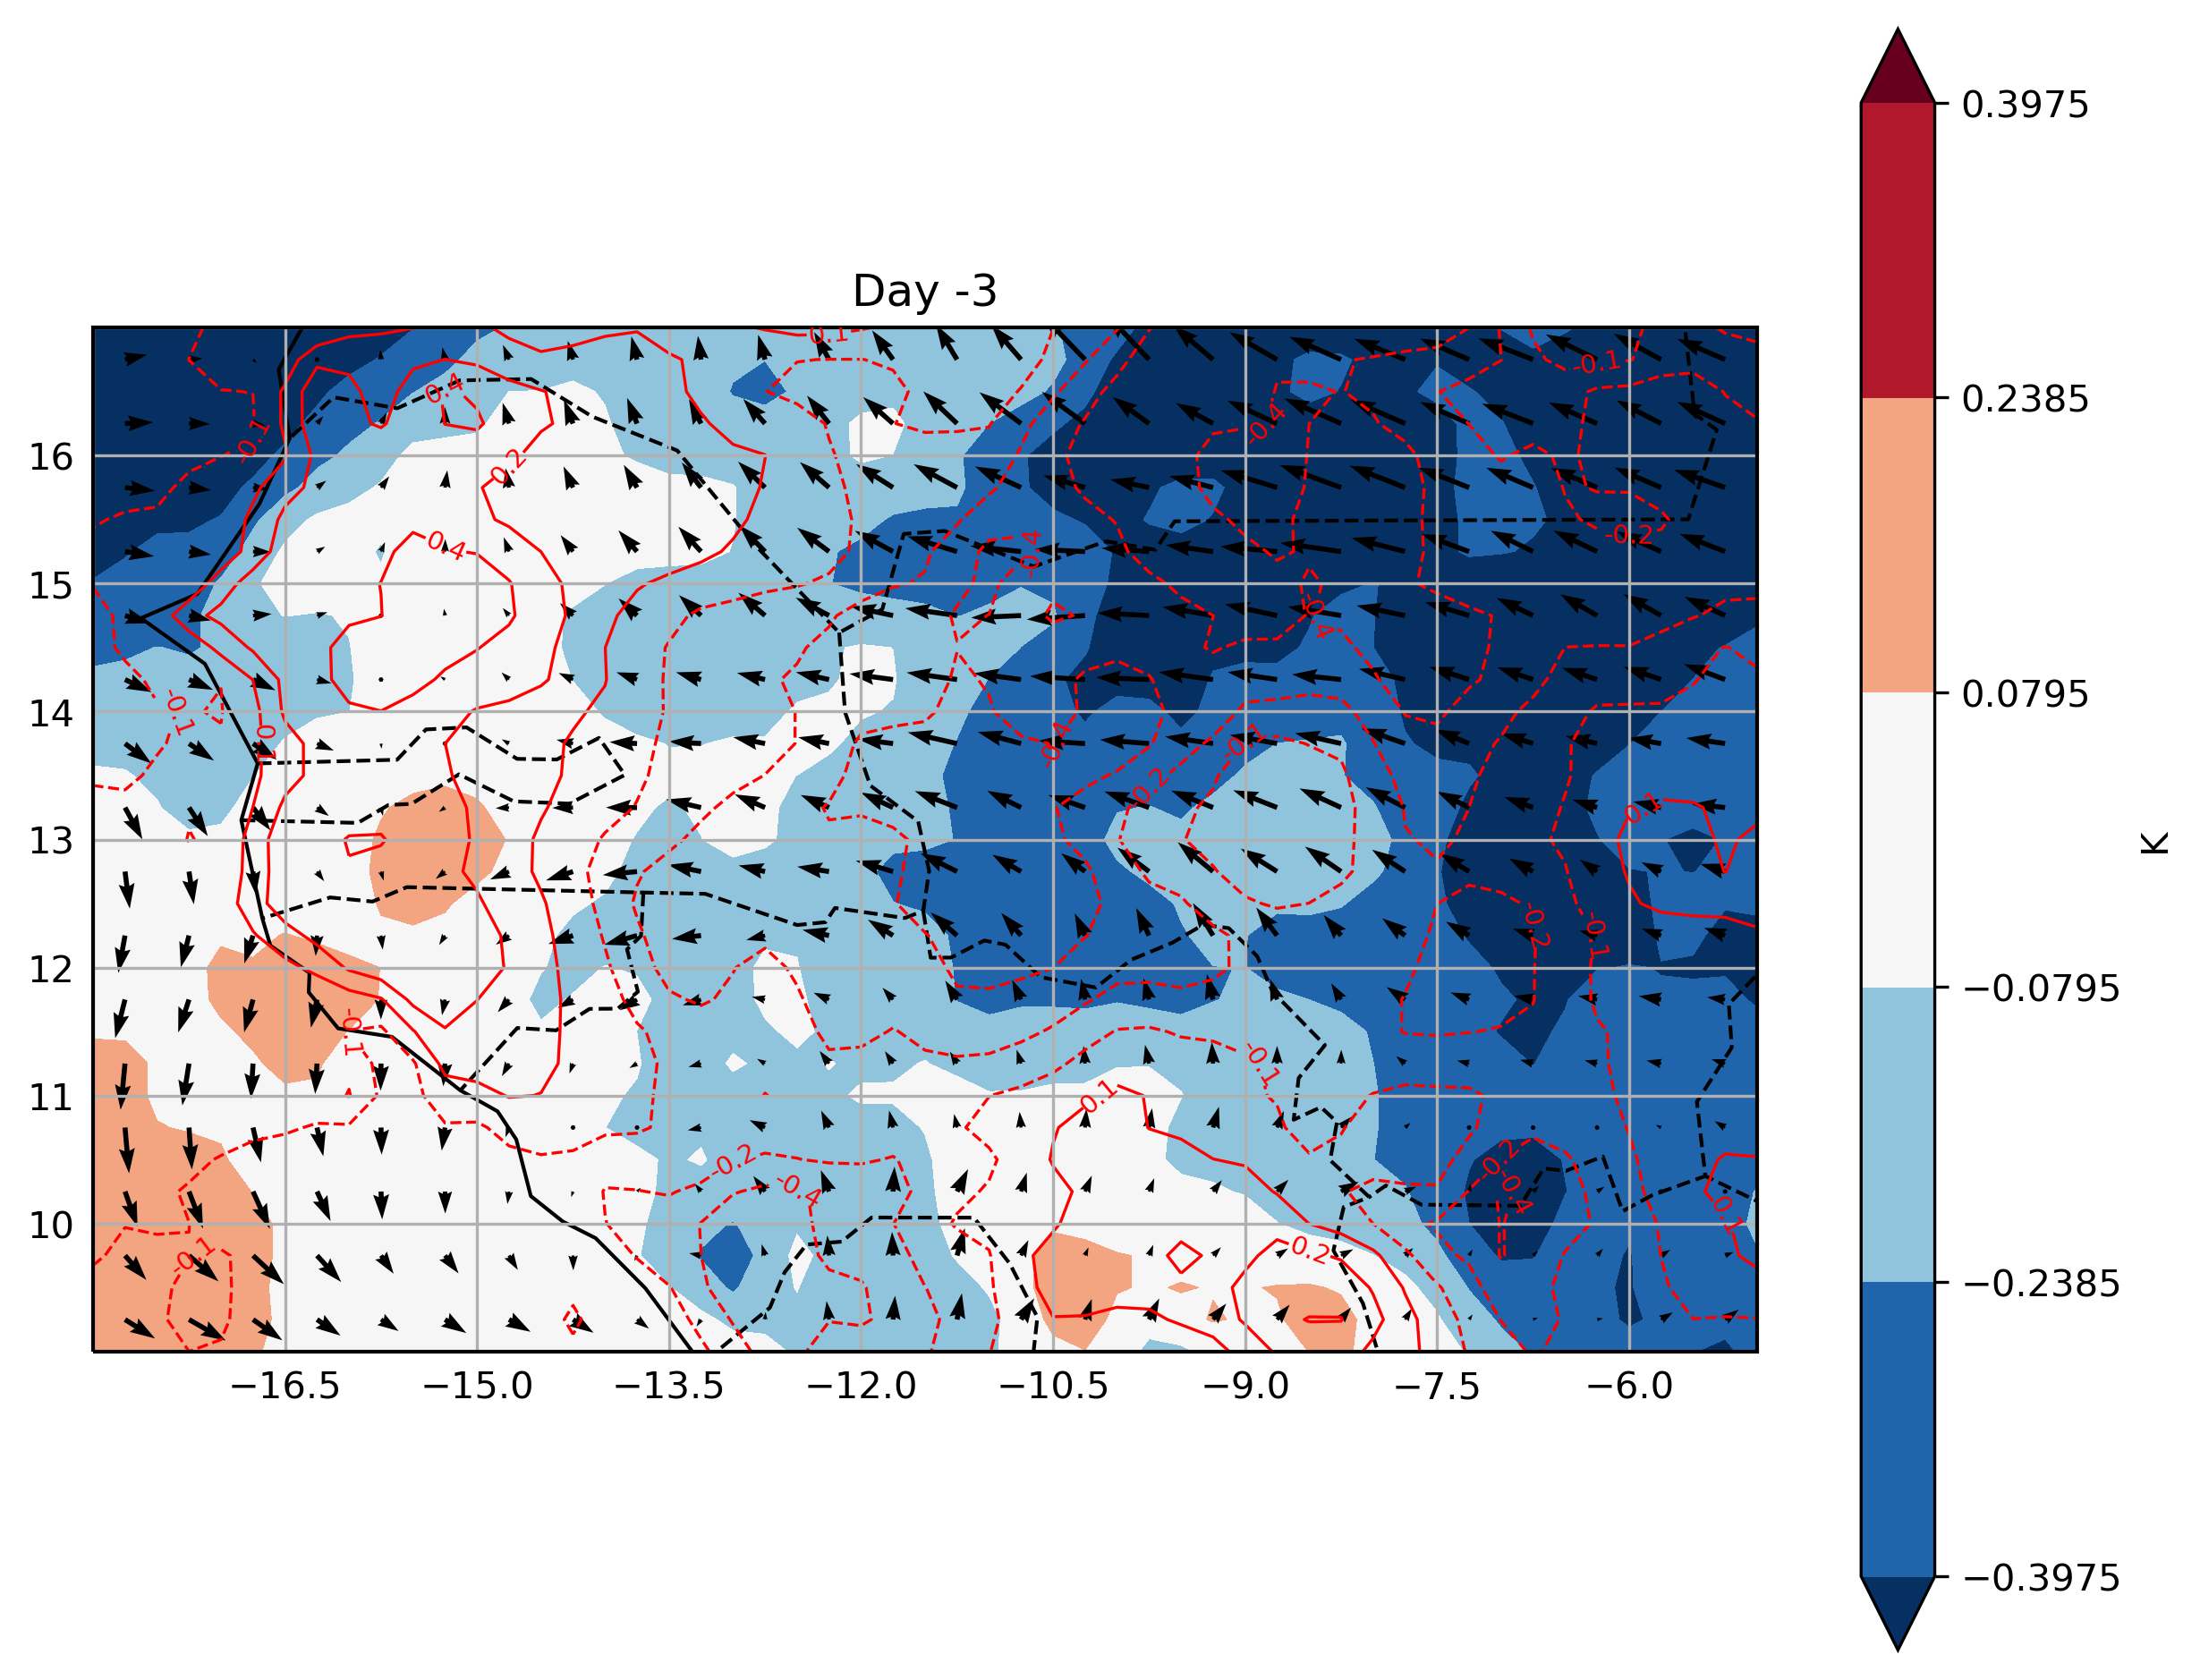

In [685]:
st=2
sarrow = 1
scale = 35
f = plt.figure(figsize=(10,8), dpi=300)

ax = f.add_subplot(111, projection=ccrs.PlateCarree())
lon2d, lat2d = np.meshgrid(lon,lat)
xquiv = lon2d[sarrow::st, sarrow::st]
yquiv = lat2d[sarrow::st, sarrow::st]


ws, wd = u_met.u_v_to_ws_wd(dic['u']-dic['u100'], dic['v']-dic['v100']) 

var = dic['t']
u = dic['u100']
v = dic['v100']
cvar = 't2'
edge = np.max([np.abs(np.percentile(dic[cvar],10)),np.abs(np.percentile(dic[cvar],90))])
levs = np.linspace(edge*-1,edge,6)
contour = {'data' : dic[cvar], 'x': lon, 'y' : lat, 'levels' : levs}

edge = np.max([np.abs(np.percentile(var,20)),np.abs(np.percentile(var,80))])
lev = np.linspace(edge*-1,edge,6)

uu = u[sarrow::st, sarrow::st]
vv = v[sarrow::st, sarrow::st]
qin = {'x' : xquiv, 'y' : yquiv, 'u' : uu, 'v' : vv, 'scale' : scale}
draw_map(ax, var, lat, lon, title='Day -3',  quiver=qin, levels=lev, contour=contour)

-3
Doing AMSR_20040804.nc
Doing AMSR_20050816.nc
Doing AMSR_20050826.nc
Doing AMSR_20060721.nc
Doing AMSR_20060723.nc
Doing AMSR_20060809.nc
Doing AMSR_20060904.nc
Doing AMSR_20070714.nc
Doing AMSR_20070722.nc
Doing AMSR_20070730.nc
Doing AMSR_20070820.nc
Doing AMSR_20070903.nc
Doing AMSR_20070909.nc
Doing AMSR_20070914.nc
Doing AMSR_20080726.nc
Doing AMSR_20080804.nc
Doing AMSR_20080806.nc
Doing AMSR_20090805.nc
Doing AMSR_20090821.nc
Doing AMSR_20090825.nc
Doing AMSR_20100828.nc
Doing AMSR_20110731.nc
Doing AMSR_20110815.nc
Doing AMSR_20110909.nc
Doing AMSR_20120629.nc
Doing AMSR_20120709.nc
Doing AMSR_20120823.nc
Doing AMSR_20120901.nc
Doing AMSR_20120903.nc
Doing AMSR_20120904.nc
Doing AMSR_20130803.nc
Doing AMSR_20130804.nc
Doing AMSR_20130914.nc
Doing AMSR_20140823.nc
Doing AMSR_20140824.nc
Doing AMSR_20140825.nc
Doing AMSR_20140906.nc
Doing AMSR_20140913.nc
File missing /home/ck/DIR/mymachine/ERA5/hourly/pressure_levels/ERA5_2015_07_pl.nc
File missing /home/ck/DIR/mymachine/ERA5

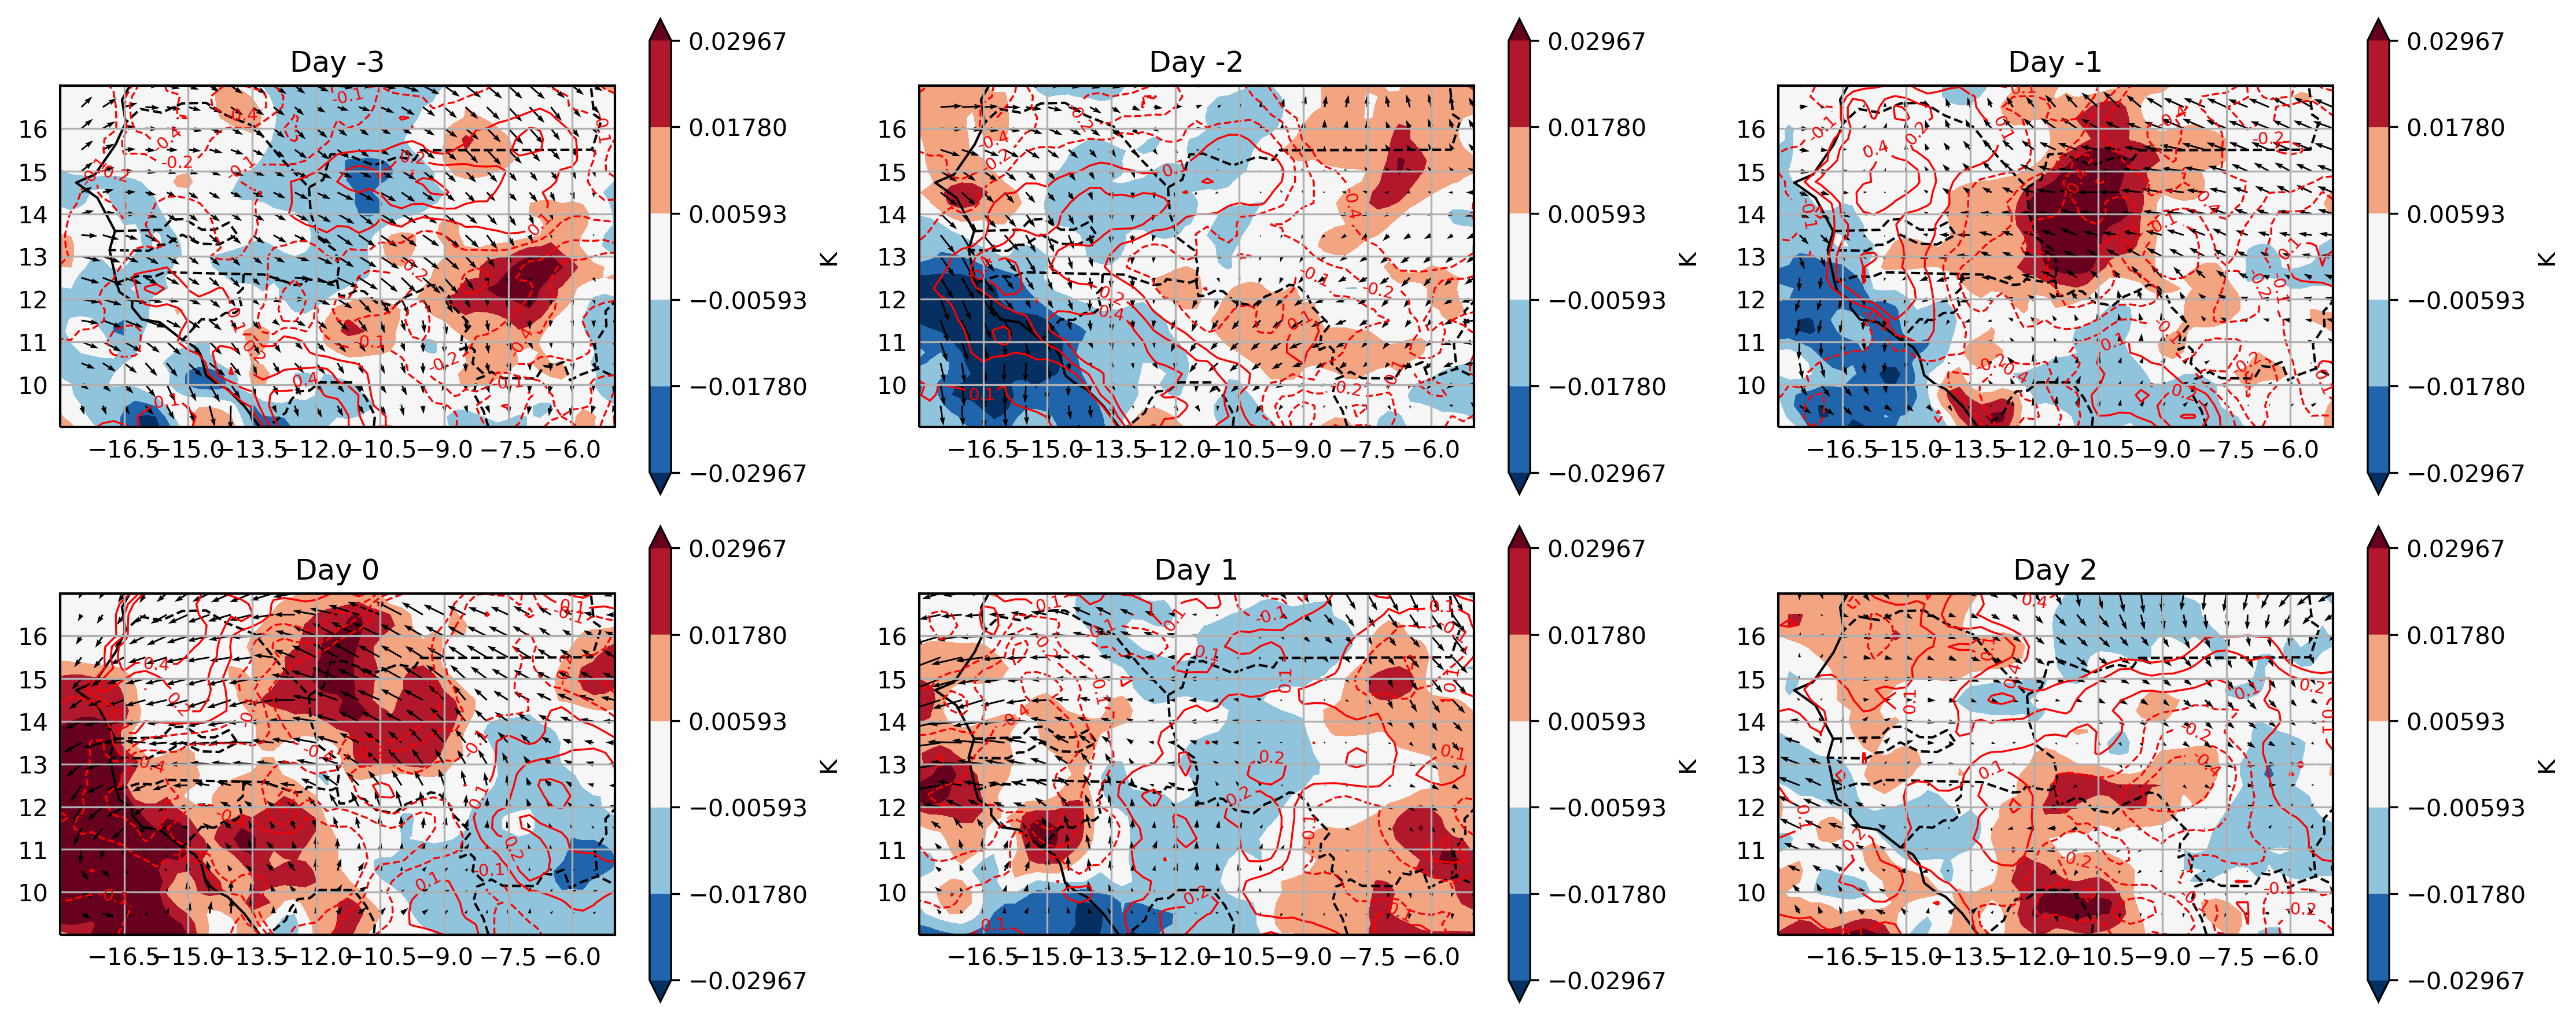

In [806]:
st=2
sarrow = 2
scale = 30
utag = 'u100'
vtag = 'v100'
f = plt.figure(figsize=(15,6), dpi=300)

for ids, num in enumerate([-3,-2,-1,0,1,2]):

    ax = f.add_subplot(2,3,ids+1, projection=ccrs.PlateCarree())
    print(num)
    dic, lat, lon = run(num)
    dic = calc(dic)
    
    if ids == 0:
        lon2d, lat2d = np.meshgrid(lon,lat)
        xquiv = lon2d[sarrow::st, sarrow::st]
        yquiv = lat2d[sarrow::st, sarrow::st]
    #ipdb.set_trace()
    
    ws, wd = u_met.u_v_to_ws_wd(dic['u_orig']-dic['u100_orig'], dic['v_orig']-dic['v100_orig'])
    var = dic['ice']
    
    if ids == 0:
        edge = np.max([np.abs(np.percentile(var,1)),np.abs(np.percentile(var,99))])
        lev = np.linspace(edge*-1,edge,6) # edge*-1
    #ipdb.set_trace()
    u = dic[utag]
    v = dic[vtag]

    uu = u[sarrow::st, sarrow::st]
    vv = v[sarrow::st, sarrow::st]
    qin = {'x' : xquiv, 'y' : yquiv, 'u' : uu, 'v' : vv, 'scale' : scale}
    
    
    cvar = 't2'
    invar = dic[cvar]
    if ids == 0:
        edge = np.max([np.abs(np.percentile(invar,5)),np.abs(np.percentile(invar,95))])
        levs = np.linspace(edge*-1,edge,6) # edge*-1
    contour = {'data' : invar, 'x' : lon, 'y' : lat, 'levels' : levs}
    
    draw_map(ax, var, lat, lon, title='Day '+str(num),  quiver=qin, levels=lev, contour=contour)  #levels=lev,

f.canvas.draw()
plt.tight_layout()
plt.savefig(cnst.network_data + 'figs/NFLICS/plots/cb_same/NFLICS_ERA5anomaly_dakarstorms_large_ice_t2_uv10_anom_1200.jpg')

## 